# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

This is the second project of the 'Self-Driving Car' Nanoprogram. In this project, I used convolutional neural networks to classify traffic signs. I trained and validated a model so it can classify traffic sign images using the [German Traffic Sign Dataset](https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip). After the model is trained, I tried out the model on newly found images of German traffic on the web.

## Step 1: Load The Data And Dataset Summary 

In [1]:
# import 
import pickle
import numpy as np
import random 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import pandas as pd
import glob
import matplotlib.image as mpimg

from numpy import newaxis
from tensorflow.contrib.layers import flatten
from sklearn.utils import shuffle
# Visualizations will be shown in the notebook.
%matplotlib inline

# Load pickled data
# Load the training, validation and testing data files 
training_file = './traffic-signs-data/train.p'
validation_file= './traffic-signs-data/valid.p'
testing_file = './traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [2]:
assert(len(X_train) == len(y_train))
assert(len(X_valid) == len(y_valid))
assert(len(X_test) == len(y_test))

print()
print("Image Shape:     {}".format(X_train[0].shape))
print()
print("Training Set:    {} samples".format(len(X_train)))
print("Validation Set:  {} samples".format(len(X_valid)))
print("Testing Set:     {} samples".format(len(X_test)))
print("Classes Number:  {} samples".format(len(np.unique(y_train))))


Image Shape:     (32, 32, 3)

Training Set:    34799 samples
Validation Set:  4410 samples
Testing Set:     12630 samples
Classes Number:  43 samples


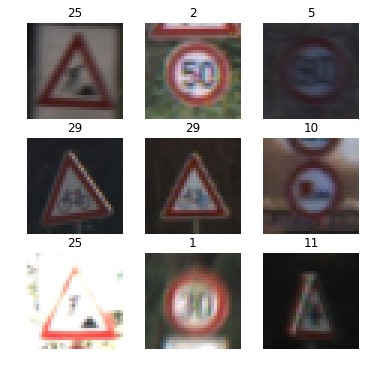

In [3]:
%matplotlib inline
# Visualize the German Traffic Signs Dataset using the pickled file(s). 
# show 9 random training data 
fig, ax = plt.subplots(3,3, figsize=(6, 6))
# https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.ravel.html
ax = ax.ravel()
for i in range(9):
    index = random.randint(0, len(X_train))
    image = X_train[index]
    ax[i].axis('off')
    ax[i].imshow(image)
    ax[i].set_title(y_train[index])


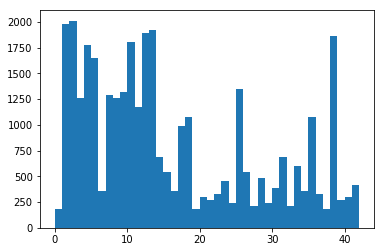

In [4]:
# plot the histogram of the training data
plt.hist(y_train, bins = np.unique(y_train))
plt.show()

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. 

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

In [5]:
# convert the image data to grayscale
# http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_colorspaces/py_colorspaces.html
# https://extr3metech.wordpress.com/2012/09/23/convert-photo-to-grayscale-with-python-opencv/
def getGrayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

# normalize train and test image to (-1,1)
# https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/91cc6685-08df-4277-b53d-3a792b02420d/concepts/71191606550923
# Lecture 6 Introduction to tensorflow, section 23 Normalized Inputs and Initial Weights, @ 1:00
# https://stats.stackexchange.com/questions/178626/how-to-normalize-data-between-1-and-1
def normalized(img):
    #return (img - 128) / 128
    # normalize image data to [0.1, 0.9]
    a = 0.1
    b = 0.9
    minimum = 0
    maximum = 255
    return (b - a) * ((img - minimum) / (maximum - minimum)) + a 

def preprocessed(images):
    gray_images = []
    for img in images:
        #gray_images.append(normalized(getGrayscale(img)))
        gray_images.append(getGrayscale(img))
    return np.array(gray_images)

In [6]:
# https://stackoverflow.com/questions/29241056/the-use-of-numpy-newaxis
#from numpy import newaxis
X_train = preprocessed(X_train)
X_train = X_train[..., newaxis]
#print(np.mean(X_train))
X_train = normalized(X_train) 
#print(np.mean(X_train))

X_valid = preprocessed(X_valid)
X_valid = X_valid[..., newaxis]
#print(np.mean(X_train))
X_valid = normalized(X_valid)

X_test = preprocessed(X_test)
X_test = X_test[..., newaxis]
#print(np.mean(X_train))
X_test = normalized(X_test)

print("preprocessed train images data shape =", X_train.shape)
print("preprocessed valid images data shape =", X_valid.shape)
print("preprocessed test images data shape =", X_test.shape)

preprocessed train images data shape = (34799, 32, 32, 1)
preprocessed valid images data shape = (4410, 32, 32, 1)
preprocessed test images data shape = (12630, 32, 32, 1)


### Model Architecture

The architecture used is the [Convolutional Neural Networks](https://adeshpande3.github.io/adeshpande3.github.io/A-Beginner%27s-Guide-To-Understanding-Convolutional-Neural-Networks/).

![title](images/Deshpande.png)

The first CNN architecture is the traditional [LeNet](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf), and the second one is the improved [leNet](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf) for traffic sign recognition. 

### Traditional LeNet
![title](images/LeNet.png)

"Usual ConvNets are organized in strict feed-forward layered architectures in which the output of one layer is fed only to the layer above." [leNet](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf)

In [7]:
# the same LeNet rchitecture as used in the CarND-LeNet-Lab 
def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    # weight = [filter_size_height, filter_size_width, color_channels, output_depth]

    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    # Activation.
    conv1 = tf.nn.relu(conv1)
    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    # The 'color_channels' is the same as the 'output_depth' of the last convolution weight 
    conv2_W = tf.Variable(tf.truncated_normal([5, 5, 6, 16], mu, sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    # Activation.
    conv2 = tf.nn.relu(conv2)    
    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Flatten. Input = 5x5x16. Output = 400.
    fc0_W = tf.Variable(tf.truncated_normal([5*5*16, 400], mu, sigma)) 
    fc0 = tf.reshape(conv2, [-1, fc0_W.get_shape().as_list()[0]])
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal([400, 120], mu, sigma)) 
    fc1_b = tf.Variable(tf.zeros(120))                      
    fc1 = tf.matmul(fc0, fc1_W) + fc1_b
    # Activation.
    fc1 = tf.nn.relu(fc1)
    # Dropout
    fc1 = tf.nn.dropout(fc1, keep_prob)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W = tf.Variable(tf.truncated_normal([120, 84], mu, sigma))
    fc2_b = tf.Variable(tf.zeros(84))
    fc2 = tf.matmul(fc1, fc2_W) + fc2_b
    # Activation.
    fc2 = tf.nn.relu(fc2)
    # Dropout
    fc2 = tf.nn.dropout(fc2, keep_prob)

    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [8]:
# Deeper filter size LeNet 
def LeNet1(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x32.
    # weight = [filter_size_height, filter_size_width, color_channels, output_depth]

    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 32), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(32))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    # Activation.
    conv1 = tf.nn.relu(conv1)
    # Pooling. Input = 28x28x32. Output = 14x14x32.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x96.
    # The 'color_channels' is the same as the 'output_depth' of the last convolution weight 
    conv2_W = tf.Variable(tf.truncated_normal([5, 5, 32, 96], mu, sigma))
    conv2_b = tf.Variable(tf.zeros(96))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    # Activation.
    conv2 = tf.nn.relu(conv2)    
    # Pooling. Input = 10x10x96. Output = 5x5x96.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Flatten. Input = 5x5x96. Output = 2400.
    fc0_W = tf.Variable(tf.truncated_normal([5*5*96, 2400], mu, sigma)) 
    fc0 = tf.reshape(conv2, [-1, fc0_W.get_shape().as_list()[0]])
    
    # Layer 3: Fully Connected. Input = 2400. Output = 600.
    fc1_W = tf.Variable(tf.truncated_normal([2400, 600], mu, sigma)) 
    fc1_b = tf.Variable(tf.zeros(600))                      
    fc1 = tf.matmul(fc0, fc1_W) + fc1_b
    # Activation.
    fc1 = tf.nn.relu(fc1)
    # Dropout
    fc1 = tf.nn.dropout(fc1, keep_prob)

    # Layer 4: Fully Connected. Input = 600. Output = 150.
    fc2_W = tf.Variable(tf.truncated_normal([600, 150], mu, sigma))
    fc2_b = tf.Variable(tf.zeros(150))
    fc2 = tf.matmul(fc1, fc2_W) + fc2_b
    # Activation.
    fc2 = tf.nn.relu(fc2)
    # Dropout
    fc2 = tf.nn.dropout(fc2, keep_prob)

    # Layer 5: Fully Connected. Input = 150. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(150, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Improved LeNet

![title](images/ImprovedLeNet.png)

Contrary to the traditional LeNet, only the output of the second stage is fed to the classifer, the output of the first stage is also branched out and fed to the classifier. By adding the procedure, the training yielded higher accuracies than the traditional method.

In [9]:
def LeNet2(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    ## STAGE 1 ##
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    # weight = [filter_size_height, filter_size_width, color_channels, output_depth]
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    # Activation.
    conv1 = tf.nn.relu(conv1)
    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    ## STAGE 2 ##

    # Layer 2: Convolutional. Output = 10x10x16.
    # The 'color_channels' is the same as the 'output_depth' of the last convolution weight 
    conv2_W = tf.Variable(tf.truncated_normal([5, 5, 6, 16], mu, sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    # Activation.
    conv2 = tf.nn.relu(conv2)    
    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # layer 3: Convolutional. Output = 1x1x400.
    conv3_W = tf.Variable(tf.truncated_normal([5, 5, 16, 400], mu, sigma))
    conv3_b = tf.Variable(tf.zeros(400))
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b
    # Activation.
    conv3 = tf.nn.relu(conv3)    
    
    ## CLASSIFIER ##
    
    # Flatten layer 2. Input = 5x5x16. Output = 400.
    conv2flat = flatten(conv2)
    print ("conv2flat shape: ", conv2flat.get_shape())   
    # Flatten layer 3. Input = 1x1x400. Output = 400.
    conv3flat = flatten(conv3)
    print ("conv3flat shape: ", conv3flat.get_shape()) 
    
    # Concat conv2flat and conv3flat. Input = 400 + 400. Output = 800
    fc0 = tf.concat([conv3flat, conv2flat], 1)
    print ("fully connection input shape: ", fc0.get_shape())     
    # Dropout
    fc0 = tf.nn.dropout(fc0, keep_prob)
    
    # Layer 4: Fully Connected. Input = 800. Output = 300.
    fc1_W = tf.Variable(tf.truncated_normal([800, 300], mu, sigma)) 
    fc1_b = tf.Variable(tf.zeros(300))                      
    fc1 = tf.matmul(fc0, fc1_W) + fc1_b
    # Activation.
    fc1 = tf.nn.relu(fc1)
    # Dropout
    fc1 = tf.nn.dropout(fc1, keep_prob)

    # Layer 4: Fully Connected. Input = 300. Output = 120.
    fc2_W = tf.Variable(tf.truncated_normal([300, 120], mu, sigma))
    fc2_b = tf.Variable(tf.zeros(120))
    fc2 = tf.matmul(fc1, fc2_W) + fc2_b
    # Activation.
    fc2 = tf.nn.relu(fc2)
    # Dropout
    fc2 = tf.nn.dropout(fc2, keep_prob)

    # Layer 5: Fully Connected. Input = 120. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(120, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits 

In [10]:
# Features and Labels
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

rate = 0.001
EPOCHS = 40
BATCH_SIZE = 128

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

### Training Pipeline
Create a training pipeline that uses the model to classify the data.

In [11]:
logits = LeNet1(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

### Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

In [12]:
# tf.argmax: https://stackoverflow.com/questions/41708572/tensorflow-questions-regarding-tf-argmax-and-tf-equal
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train the Model
Run the training data through the training pipeline to train the model.
Before each epoch, shuffle the training set.
After each epoch, measure the loss and accuracy of the validation set.
Save the model after training.

In [13]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        #if i % 5 == 0:
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.812
EPOCH 2 ...
Validation Accuracy = 0.908
EPOCH 3 ...
Validation Accuracy = 0.950
EPOCH 4 ...
Validation Accuracy = 0.963
EPOCH 5 ...
Validation Accuracy = 0.954
EPOCH 6 ...
Validation Accuracy = 0.956
EPOCH 7 ...
Validation Accuracy = 0.967
EPOCH 8 ...
Validation Accuracy = 0.965
EPOCH 9 ...
Validation Accuracy = 0.970
EPOCH 10 ...
Validation Accuracy = 0.975
EPOCH 11 ...
Validation Accuracy = 0.968
EPOCH 12 ...
Validation Accuracy = 0.953
EPOCH 13 ...
Validation Accuracy = 0.970
EPOCH 14 ...
Validation Accuracy = 0.963
EPOCH 15 ...
Validation Accuracy = 0.967
EPOCH 16 ...
Validation Accuracy = 0.963
EPOCH 17 ...
Validation Accuracy = 0.968
EPOCH 18 ...
Validation Accuracy = 0.969
EPOCH 19 ...
Validation Accuracy = 0.971
EPOCH 20 ...
Validation Accuracy = 0.959
EPOCH 21 ...
Validation Accuracy = 0.963
EPOCH 22 ...
Validation Accuracy = 0.969
EPOCH 23 ...
Validation Accuracy = 0.963
EPOCH 24 ...
Validation Accuracy = 0.960
EPOCH 25 ...

In [13]:
# test the trained NN accuarcy using the testing file data 
with tf.Session() as sess:
    saver = tf.train.import_meta_graph('./lenet.meta')
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from .\lenet
Test Accuracy = 0.963


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [14]:
# read in the signnames.csv to visulize the trafic sign names 
pd.read_csv('./signnames.csv').values

array([[0, 'Speed limit (20km/h)'],
       [1, 'Speed limit (30km/h)'],
       [2, 'Speed limit (50km/h)'],
       [3, 'Speed limit (60km/h)'],
       [4, 'Speed limit (70km/h)'],
       [5, 'Speed limit (80km/h)'],
       [6, 'End of speed limit (80km/h)'],
       [7, 'Speed limit (100km/h)'],
       [8, 'Speed limit (120km/h)'],
       [9, 'No passing'],
       [10, 'No passing for vehicles over 3.5 metric tons'],
       [11, 'Right-of-way at the next intersection'],
       [12, 'Priority road'],
       [13, 'Yield'],
       [14, 'Stop'],
       [15, 'No vehicles'],
       [16, 'Vehicles over 3.5 metric tons prohibited'],
       [17, 'No entry'],
       [18, 'General caution'],
       [19, 'Dangerous curve to the left'],
       [20, 'Dangerous curve to the right'],
       [21, 'Double curve'],
       [22, 'Bumpy road'],
       [23, 'Slippery road'],
       [24, 'Road narrows on the right'],
       [25, 'Road work'],
       [26, 'Traffic signals'],
       [27, 'Pedestrians'],
       [

new test images shape = (6, 32, 32, 3)


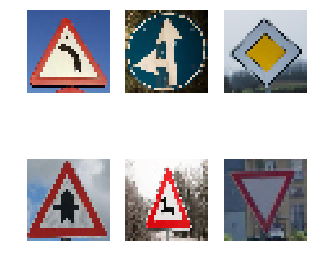

In [15]:
#reading in new images found on-line 

fig, ax = plt.subplots(2,3, figsize=(5, 5))
ax = ax.ravel()

new_images = glob.glob('new_test_images/*.jpg')
new_test_images = []

for i, img in enumerate(new_images):
    
    images = cv2.cvtColor(cv2.imread(img), cv2.COLOR_BGR2RGB)
    resized_images = cv2.resize(images, (32, 32)) 
    
    ax[i].axis('off')
    ax[i].imshow(resized_images)
    
    new_test_images.append(resized_images)

# show images shape
new_test_images = np.array(new_test_images)
newImg = new_test_images
print("new test images shape =", new_test_images.shape)

### Predict the Sign Type for Each Image

In [16]:
# preprocessing new images
# Make sure to pre-process the images with the same pre-processing pipeline used earlier.
# Iterate through grayscale
new_test_images = preprocessed(new_test_images)
new_test_images = new_test_images[..., newaxis]

# Normalize
new_test_images = normalized(new_test_images) 

# Double-check that the image is changed to depth of 1
new_image_shape = new_test_images.shape
print("Processed new images shape =", new_image_shape)

Processed new images shape = (6, 32, 32, 1)


### Analyze Performance

In [17]:
# do the prediction
test_labels = [19, 37, 12, 11, 31, 13]

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./lenet.meta')
    saver.restore(sess, "./lenet")
    my_accuracy = evaluate(new_test_images, test_labels)
    print("Test Set Accuracy = {:.3f}".format(my_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Set Accuracy = 1.000


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). 

[`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

INFO:tensorflow:Restoring parameters from ./lenet


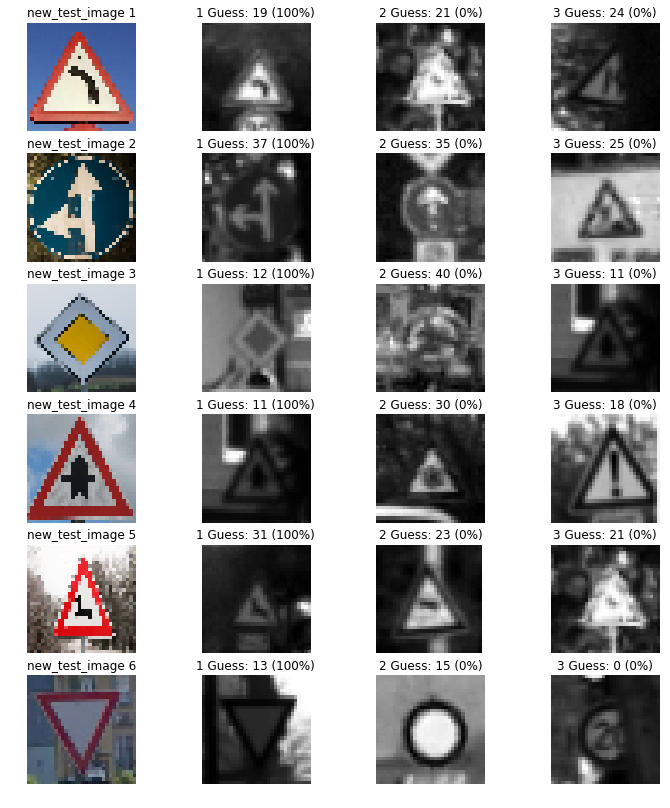

In [18]:
### Visualize the softmax probabilities.

softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=3)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./lenet.meta')
    saver.restore(sess, "./lenet")
    softmax_logits = sess.run(softmax_logits, feed_dict={x: new_test_images, keep_prob: 1.0})
    top_k = sess.run(top_k, feed_dict={x: new_test_images, keep_prob: 1.0})

    
    fig, ax = plt.subplots(len(newImg),4, figsize=(12, 14))
    ax = ax.ravel()     
        
    for i, image in enumerate(newImg):
        # show test images in the first column      
        ax[4*i].axis('off')
        ax[4*i].imshow(image)
        ax[4*i].set_title('new_test_image {}'.format(i+1))
        
        # print the grayscaled guess 
        for j in range(1, 4):
            guess = []
            guess = top_k[1][i][j-1]
            index = np.argwhere(y_valid == guess)[0]
            ax[4*i+j].axis('off')
            ax[4*i+j].imshow(X_valid[index].squeeze(), cmap='gray')
            ax[4*i+j].set_title('{} Guess: {} ({:.0f}%)'.format(j, guess, 100*top_k[0][i][j-1]))

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.